In [1]:
# Just a basic configuration
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18.0, 7.0)

In [2]:
# a typing function, to split agencies into 3 types:
def typer(x):
    if x=="Publicis" or \
       x=="WPP" or \
       x=="Interpublic" or \
       x=="Havas" or \
       x=="Omnicom":            
        return 'BIGHOLD'
    elif x=="Independent":        
        return 'INDY'
    else:        
        return 'SMALLHOLD'

In [3]:
adage = pd.read_csv('./adage-data/2016_adage-indies_v2.1.csv')
adage2 = adage.copy(deep=True)
adage

,AGENCY,PARENT,2015 US REVENUE,% CHG
0,Epsilon,Alliance Data Systems Corp.,1855045,3.5
1,Accenture Interactive,Accenture,1231596,70.8
2,Deloitte Digital*,Deloitte,865200,NaN
3,IBM Interactive Experience*,IBM Corp.,796800,NaN
4,Acxiom Corp.*,Independent,765299,7.0
5,Razorfish Global*,Publicis,651665,-1.3
6,PwC Digital Services,PwC,624000,NaN
7,BBDO Worldwide*,Omnicom,602798,4.5
8,SapientNitro*,Publicis,585000,1.3
9,McCann*,Interpublic,561860,15.9


In [4]:
adage.PARENT = adage.PARENT.apply(typer)
adage

,AGENCY,PARENT,2015 US REVENUE,% CHG
0,Epsilon,SMALLHOLD,1855045,3.5
1,Accenture Interactive,SMALLHOLD,1231596,70.8
2,Deloitte Digital*,SMALLHOLD,865200,NaN
3,IBM Interactive Experience*,SMALLHOLD,796800,NaN
4,Acxiom Corp.*,INDY,765299,7.0
5,Razorfish Global*,BIGHOLD,651665,-1.3
6,PwC Digital Services,SMALLHOLD,624000,NaN
7,BBDO Worldwide*,BIGHOLD,602798,4.5
8,SapientNitro*,BIGHOLD,585000,1.3
9,McCann*,BIGHOLD,561860,15.9


<hr>
First...how many "small holding companies" are there 
(within the total 915 agencies listed)?

In [5]:
adage.groupby('PARENT').size()

PARENT
BIGHOLD      200
INDY         634
SMALLHOLD     81
dtype: int64

<hr>
Only 81 small holding companies...interesting.<br>
How does the small holding companies revenue distribute?<br>
We know that Epsilon, Accenture, and Deloitte will throw this distribution off since they have revenues in the neighborhood of 1B.<br>
So let's start by filtering the affordable ones...e.g. less than a billion. We'll cap revenues at $100M

In [6]:
affordable = adage[(adage['2015 US REVENUE'] > 999) & (adage['2015 US REVENUE'] < 99999)]
affordable.groupby('PARENT').size()

PARENT
BIGHOLD      125
INDY         607
SMALLHOLD     57
dtype: int64

<hr>
Only 57 small holding companies less than 100M<br>
So ignoring those top 20, where do most of these holding companies sit?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119fbb690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c498810>]], dtype=object)

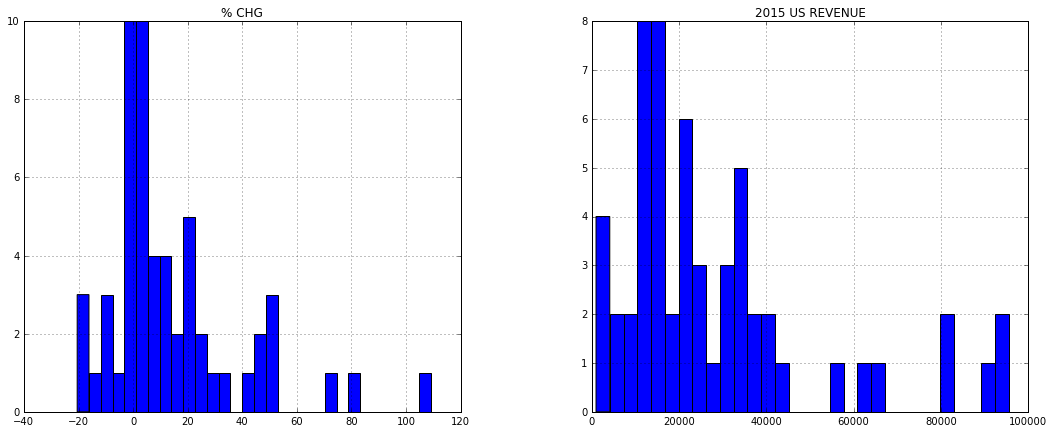

In [7]:
affordable[affordable['PARENT']=="SMALLHOLD"].hist(bins=30)

<hr>
Clearly the majority of these companies sit in the below 40M space.<br>
Also clear that the most of the company revenues grow or shring aroun 20% (positive or negative)<br>

In [8]:
radar = adage[(adage['2015 US REVENUE'] > 999) & (adage['2015 US REVENUE'] < 39999)]
radar.groupby('PARENT').size()

PARENT
BIGHOLD       83
INDY         553
SMALLHOLD     46
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c7a04d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d511ed0>]], dtype=object)

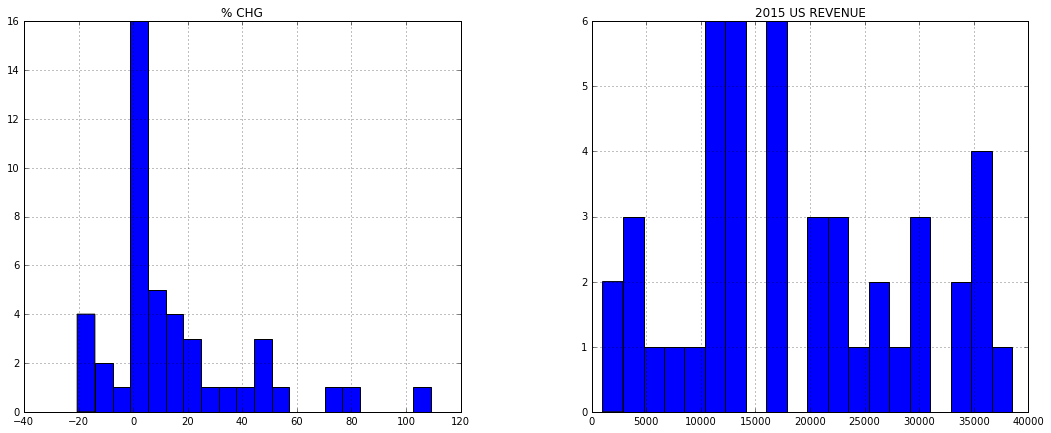

In [9]:
radar[radar['PARENT']=="SMALLHOLD"].hist(bins=20)

<hr>
So I will focus on the revenue bracket where the majority of these companies sit...less than $40M<br>
First thing is to cluster the holding companies and see how many unique holding companies there are.<br>
To do that I need to work on that backup dataframe that has the agencies (and parents) real names.<br>
Also want to filter the same revenue bracket as previous

In [10]:
smhold_grp = adage2[(adage2['2015 US REVENUE'] > 999) & (adage2['2015 US REVENUE'] < 39999)].groupby('PARENT')
smhold_grp.size()

PARENT
Advance Publications                   1
Asatsu-DK                              1
BlueFocus Communication Group          3
Cheil Worldwide                        3
Creston                                1
DJE Holdings                           1
Dentsu                                 6
Eastport Holdings                      3
Hakuhodo DY Holdings                   1
Huntsworth                             1
Independent                          553
Interpublic                           21
M&C Saatchi                            1
MDC Partners                          15
Matomy Media Group                     1
Mother Holdings                        1
Next Fifteen Communications Group      3
Omnicom                               33
Project WorldWide                      3
Publicis                              15
Time Inc.                              1
WPP                                   14
dtype: int64

<hr>
Now that is fascinating. Most of the 'small holding companies' only hold a single agency. 

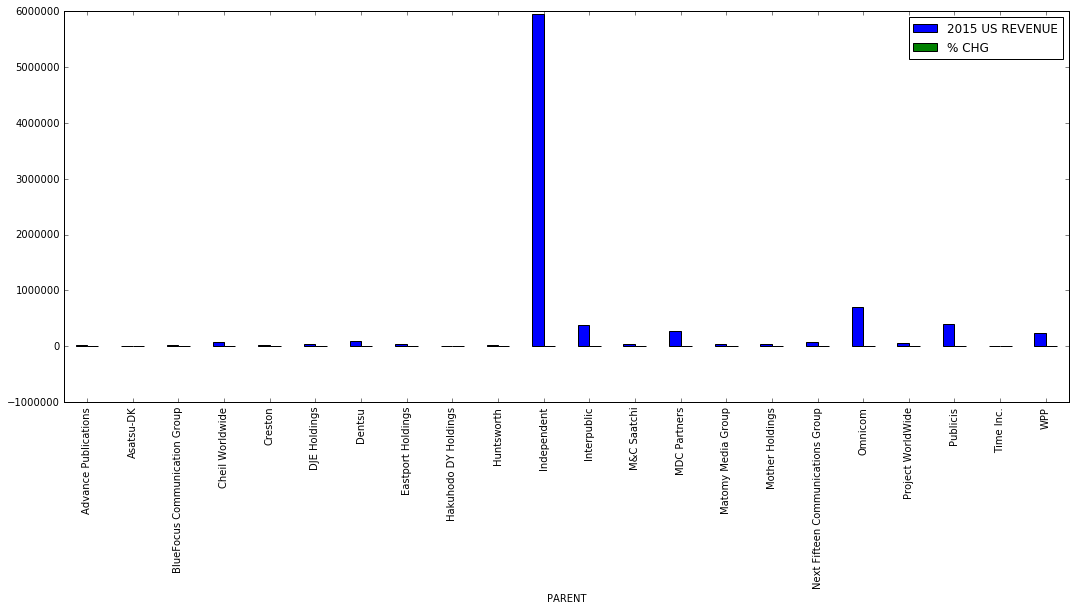

In [11]:
sales_totals = smhold_grp.sum()
my_plot = sales_totals.plot(kind='bar')

<hr>
Look how much the Independents make versus the Big Guys.<br>
That 'Independents' revenue is really throwing off this histogram, so let's remove independents from this view<br>
While we are at it, the big holding companies will also skew this view<br>
Also Dentsu and MDC partners<br>
Let's try just the smaller guys.

In [12]:
smhold_group2 = adage2[(adage2['2015 US REVENUE'] > 999) \
                       & (adage2['2015 US REVENUE'] < 39999) \
                       & (adage2['PARENT'] != 'Independent') \
                       & (adage2['PARENT'] != 'Publicis') \
                       & (adage2['PARENT'] != 'Interpublic') \
                       & (adage2['PARENT'] != 'Omnicom') \
                       & (adage2['PARENT'] != 'WPP') \
                       & (adage2['PARENT'] != 'Dentsu') \
                       & (adage2['PARENT'] != 'MDC Partners') \
                      ].groupby('PARENT')
smhold_group2.size()

PARENT
Advance Publications                 1
Asatsu-DK                            1
BlueFocus Communication Group        3
Cheil Worldwide                      3
Creston                              1
DJE Holdings                         1
Eastport Holdings                    3
Hakuhodo DY Holdings                 1
Huntsworth                           1
M&C Saatchi                          1
Matomy Media Group                   1
Mother Holdings                      1
Next Fifteen Communications Group    3
Project WorldWide                    3
Time Inc.                            1
dtype: int64

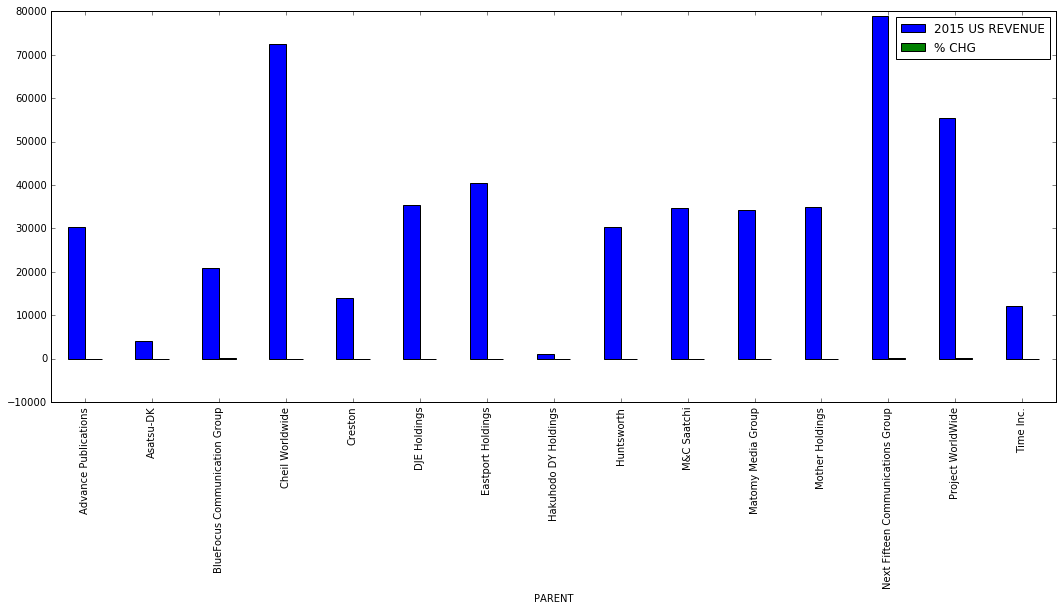

In [13]:
sales_totals = smhold_group2.sum()
my_plot = sales_totals.plot(kind='bar')

<hr>
Unfortunately this chart is a little ugly. With a few tweaks we can make it a little more impactful. Let’s try:<br>
* sorting the data in descending order
* removing the legend
* adding a title
* labeling the axes

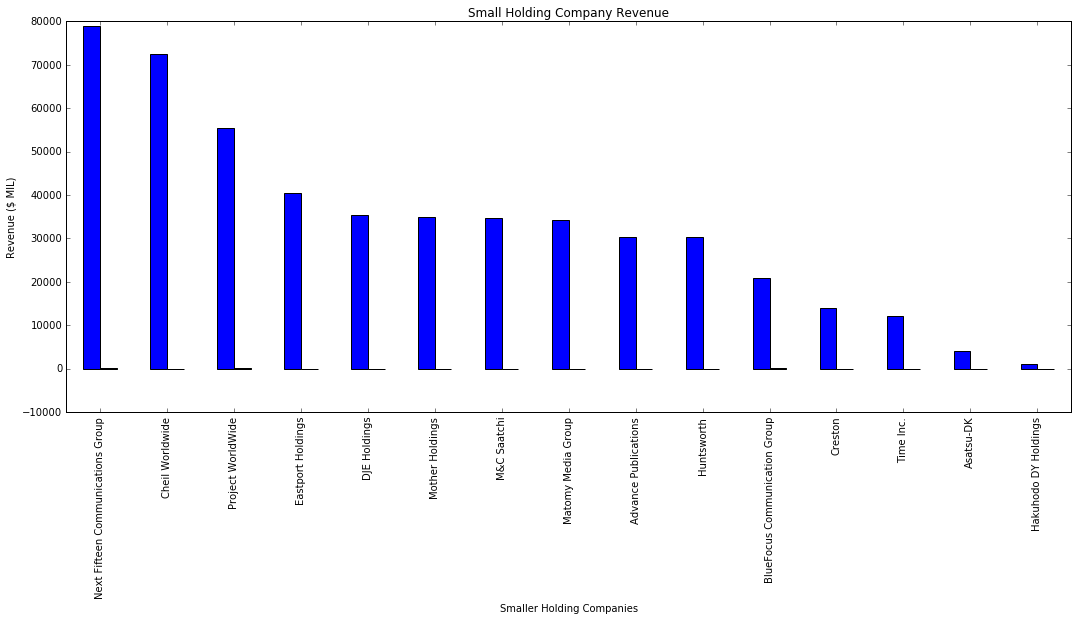

In [14]:
my_plot = sales_totals.sort(columns='2015 US REVENUE',ascending=False).plot(kind='bar',legend=None,title="Small Holding Company Revenue")
my_plot.set_xlabel("Smaller Holding Companies")
my_plot.set_ylabel("Revenue ($ MIL)")

<hr>
I am beginning to think that MDC Partners and Dentsu is more like a Big Holding company than a small one.<br><br>
First need a pie chart of the totals.

In [17]:
usagencies = adage.groupby('PARENT')
usagencies.size()

PARENT
BIGHOLD      200
INDY         634
SMALLHOLD     81
dtype: int64

In [19]:
usagencies.sum()

,2015 US REVENUE,% CHG
PARENT,,
BIGHOLD,22858077,1344.7
INDY,12696425,6242.6
SMALLHOLD,11198654,1021.7


<hr>
Also want to get the top earning independents.

In [37]:
indies = adage2[adage2['PARENT'] == "Independent"]
indies

,AGENCY,PARENT,2015 US REVENUE,% CHG
4,Acxiom Corp.*,Independent,765299,7.0
15,Merkle,Independent,464500,5.8
22,Harte Hanks*,Independent,380940,-14.3
41,Freeman,Independent,260000,5.7
46,Horizon Media*,Independent,225000,20.3
48,Wieden & Kennedy*,Independent,219000,6.3
57,Richards Group,Independent,190000,2.2
70,Match Marketing Group,Independent,153247,13.3
82,Cramer-Krasselt,Independent,131149,-9.8
85,Droga5,Independent,126000,61.5


In [35]:
indy_radar = indies[(indies['2015 US REVENUE'] > 19999) & (indies['2015 US REVENUE'] < 59999)]
indy_radar.describe()

,2015 US REVENUE,% CHG
count,116.000000,112.000000
mean,33169.301724,9.992857
std,10717.883755,23.002564
min,20000.000000,-29.800000
25%,23278.250000,-0.325000
50%,31243.000000,4.900000
75%,41540.000000,13.525000
max,58000.000000,150.000000


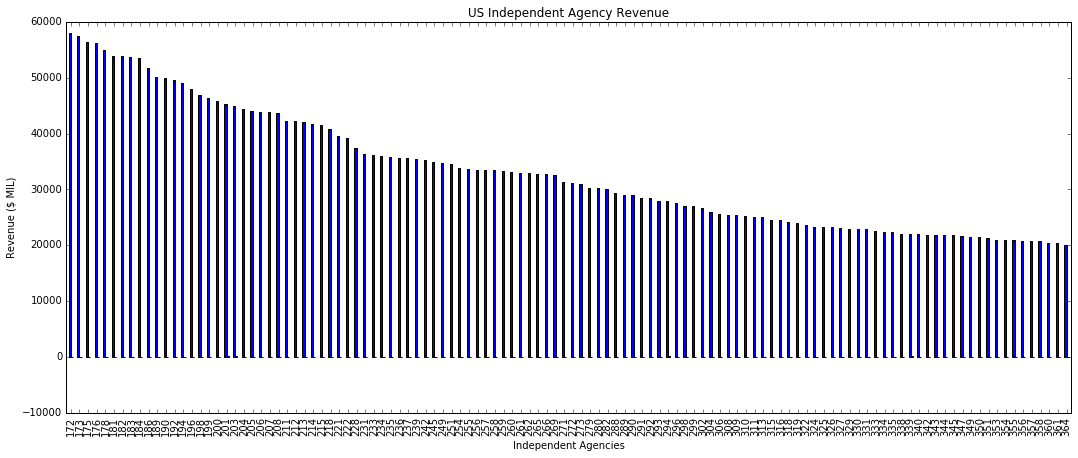

In [36]:
indy_plot = indy_radar.sort(columns='2015 US REVENUE',ascending=False).plot(kind='bar',legend=None,title="US Independent Agency Revenue")
indy_plot.set_xlabel("Independent Agencies")
indy_plot.set_ylabel("Revenue ($ MIL)")